<a href="https://colab.research.google.com/github/melltl/data_science_courses/blob/main/text%20mining/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mineração de texto
tecnica usada para tirar infos de base de dados de texto


NLP(natural language processing)


In [8]:
import nltk
import re
from nltk.corpus import wordnet
nltk.download('punkt')
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import RSLPStemmer
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#word tokenize = separa as palavras e gera um token
frase= 'Python eh uma linguagem fenomenal'
palavras=nltk.word_tokenize(frase)
palavras

['Python', 'eh', 'uma', 'linguagem', 'fenomenal']

In [ ]:
#frequencia que as palavras aparecem
frequencia=FreqDist(['six','six','six','Iron Maiden','the','Best','Iron Mainden','forever'])
frequencia

FreqDist({'six': 3, 'Iron Maiden': 1, 'the': 1, 'Best': 1, 'Iron Mainden': 1, 'forever': 1})

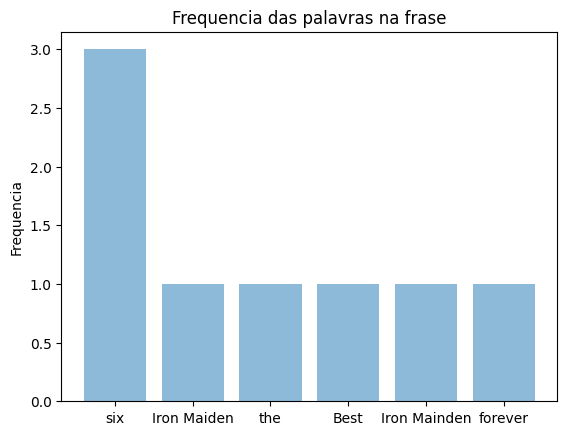

In [ ]:
#plotar a frequencia das palavras na fase
palavras=frequencia.keys()
y_pos=np.arange(len(palavras))
contagem = frequencia.values()

plt.bar(y_pos,contagem,align='center',alpha=0.5)
plt.xticks(y_pos,palavras)
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')

plt.show()

##stemming
reduzir uma palavra na forma da sua radical
usado para fazer pre processamento de dados

In [ ]:
#stemming em portugues
stemmer= nltk.stem.RSLPStemmer()

In [ ]:
stemmer.stem('Trabalhou')
#retorna uma versao reduzida da palavra
#diminui o numero de palavras distintas
#para tarefas de analise de sentimento usando essa biblioteca teve uma piora no modelo

'trabalh'

In [ ]:
stemmer= nltk.stem.SnowballStemmer("english")
#stemming em ingles

In [ ]:
stemmer.stem('running')

'run'

In [ ]:
#funcao para aplicar stemming
def Stemming(instancia):
  stemmer= nltk.stem.RSLPStemmer()
  palavras=[]
  for w in instancia.split():
    palavras.append(stemmer.stem(w))
  return(" ".join(palavras))

In [ ]:
Stemming('Frase de teste para o curso de data science')

'fras de test par o curs de dat scienc'

#lemmatization
- desflexiona uma palavra para deteminar o seu lema
- tecnica usada para fazer pre processamento de dados

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
print(lemmatizer.lemmatize("cats"))
# difernca para o stemmin é que se nao encontrar o lema da palavra ela n corta a palavara ao indes do stemming que pode
#retornar algo que nao existe

cat


In [ ]:
lemmatizer.lemmatize('is',pos='n')
#parametro p = part os speech, qual a funcao gramatical da palavra que a gente quer bujscar
#padrao é 'n'==substantivo

'is'

In [ ]:
lemmatizer.lemmatize('is',pos='v')
#v=verbo

'be'

In [ ]:
lemmatizer.lemmatize('better',pos='a')
#a = adjetivo

'good'

#stoptoWords
palavras  ou termos que sao muito usadas mas n tem signifixado: é,o,a

In [ ]:
stopwords=nltk.corpus.stopwords.words('portuguese')
stopwords

In [ ]:
def RemoviStopWords(instancia):
  instancia=instancia.lower()
  stopwords=set(nltk.corpus.stopwords.words('portuguese'))
  palavras=[i for i in instancia.split() if not i in stopwords]
  return(" ".join(palavras))

#part os speech
- identifica a função gramatical de um texto

In [9]:
text= nltk.word_tokenize("O blog MinerandoDados é muito bom")

#n funciona mt bem em pt br
nltk.pos_tag(text)

[('O', 'NNP'),
 ('blog', 'NN'),
 ('MinerandoDados', 'NNP'),
 ('é', 'NNP'),
 ('muito', 'NN'),
 ('bom', 'NN')]

In [10]:
text= nltk.word_tokenize("My print is very good")
nltk.pos_tag(text)

[('My', 'PRP$'),
 ('print', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ')]

#wordnet

In [13]:
from nltk.corpus import wordnet
nltk.download('wordnet')
wordnet.synsets('bike')

[nltk_data] Downloading package wordnet to /root/nltk_data...


[Synset('motorcycle.n.01'), Synset('bicycle.n.01'), Synset('bicycle.v.01')]

In [18]:
#definicoes das palavras
wordnet.synset('bicycle.n.01').definition()

'a wheeled vehicle that has two wheels and is moved by foot pedals'

In [19]:
#hiponimos da palavra bicycle
#conceitos mais especificos
wordnet.synset('bicycle.n.01').hyponyms()

[Synset('bicycle-built-for-two.n.01'),
 Synset('mountain_bike.n.01'),
 Synset('ordinary.n.04'),
 Synset('push-bike.n.01'),
 Synset('safety_bicycle.n.01'),
 Synset('velocipede.n.01')]

In [21]:
#hiperonimos
#conceitos mais genericos
wordnet.synset('bicycle.n.01').hypernyms()

[Synset('wheeled_vehicle.n.01')]

In [23]:
#meronysms da palavra bicycle
#conceitos pastes de outros conceitos
wordnet.synset('bicycle.n.01').part_meronyms()

[Synset('bicycle_seat.n.01'),
 Synset('bicycle_wheel.n.01'),
 Synset('chain.n.03'),
 Synset('coaster_brake.n.01'),
 Synset('handlebar.n.01'),
 Synset('kickstand.n.01'),
 Synset('mudguard.n.01'),
 Synset('pedal.n.02'),
 Synset('sprocket.n.02')]